In [2]:
# import libraries
import numpy as np                    
import pandas as pd                     
import seaborn as sns                         
import matplotlib.pyplot as plt

In [5]:
# import data 
ds = pd.read_csv('../dev_space/penguins.csv')
ds.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
ds.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [9]:
ds_clean = ds.dropna(subset='sex')
ds_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


<Axes: ylabel='Density'>

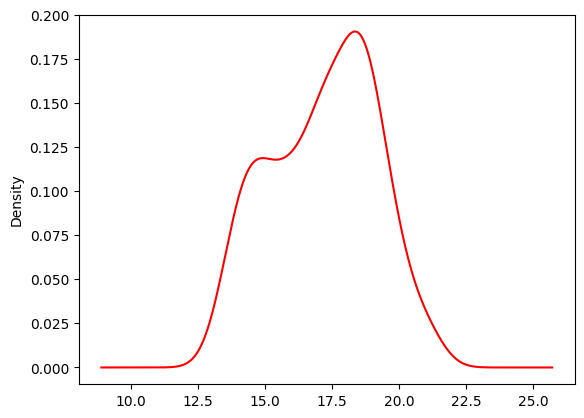

In [10]:
ds_clean['bill_depth_mm'].plot(kind='density', color='red')

<Axes: >

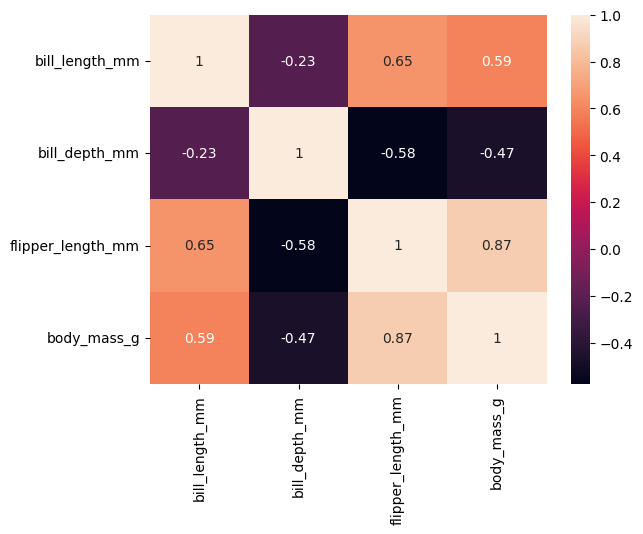

In [17]:
ds_num = ds_clean.select_dtypes(include='float64')
corred = ds_num.corr()

sns.heatmap(corred, annot=True)

In [18]:
ds_clean.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [ ]:

# Import preprocessing and encoders
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

enchoder = LabelEncoder()
ds_clean['species_enchoded'] = enchoder.fit_transform(ds_clean['species'])


# define x and y data for the analysis
X = ds_clean.loc[:,['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g']]


y = ds_clean['species_enchoded']


C:\Users\Owner\AppData\Local\Temp\ipykernel_7540\266557846.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_clean['species_enchoded'] = enchoder.fit_transform(ds_clean['species'])


In [25]:
# import libraries
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# scale the data using Min Max Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [26]:
from xgboost import XGBClassifier

# create the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state= 42)

# fit model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [30]:
from sklearn.metrics import classification_report, accuracy_score

# predict
y_predict = xgb_model.predict(X_test)


# Evaluation
c_report = classification_report(y_test, y_predict, target_names=enchoder.classes_)
print(c_report)

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



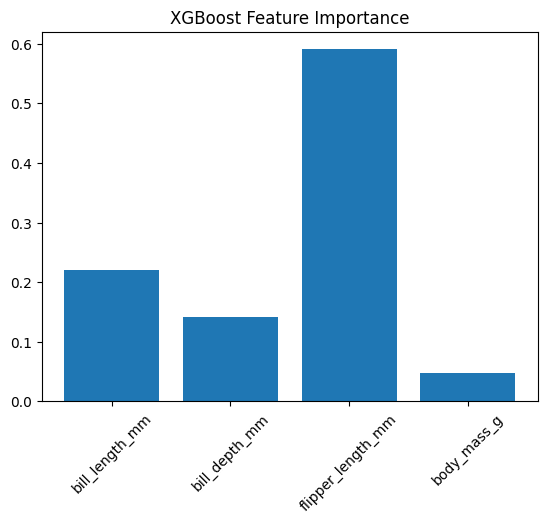

In [33]:
import matplotlib.pyplot as plt

xgb_model.feature_importances_

# Plot
plt.bar(X.columns, xgb_model.feature_importances_)
plt.title("XGBoost Feature Importance")
plt.xticks(rotation=45)
plt.show()
